# DeepTrack - Generating point particles

This notebook will demonstrate how to easily generate point particles. 


## Setup

Top level code includes the import statement of the classes we will need, as well as adding the path of the DeepTrack module to out path. This last step is only needed if the module is downloaded through git instead of installed as a package.

In [1]:
import sys
sys.path.append("..")

from DeepTrack.Generators import Generator
from DeepTrack.Particles import PointParticle
from DeepTrack.Backend.Distributions import uniform_random
from DeepTrack.Noise import Gaussian, Offset
from DeepTrack.Optics import BaseOpticalDevice2D

import numpy as np
import matplotlib.pyplot as plt

## Creating the generator

The generator is the interface between the network and the image creation. It requires only a OpticalDevice instance as an input. The OpticalDevice simulates the optical properties the objects are imaged though. In this example we will use BaseOpticalDevice2D, which represents an unaborrated system.

In [12]:
Optics = BaseOpticalDevice2D(
    shape=(128,128),         # Desired output shape of the generator.
    NA=0.7,                # The NA of the optical system.
    pixel_size=0.1e-6,     # The pixel_size of the optical system (m^-1).
    wavelength=0.68e-6     # The wavelength of the illuminating source (m).
)

G = Generator(Optics)

## Defining the particles

The generator takes a set of objects, and images them through the optical system. The objects represent a set of rules determining how to create a single, random instance of that object. 

In this case we a single object, or feature, a particle. The particle object, for instance, contain all the information needed to image a random instance of that particle. This randomization may include properties such as its position or its intensity, and is determined by input parameters.

In the example below we can see the two diferent ways of defining these random parameters: 
* A list, where one of the elements of the list is drawn with equal probability.
* A distribtion, where a random output is drawn from a distribution. Here, uniform random. 

In [14]:
P = PointParticle(                                         
    intensity=np.linspace(50,100),                          # Intensity of the light scattered by the particle
    position_distribution=uniform_random((128,128,20))      # The distrbution from which to draw the position of the particle
)

## Generating the image

Finally, we have everything needed to create an image! This is done using the class method `Generator.get`. This returns an Image object. This behaves exactly like a normal numpy ndarray, just additionally storing the properties used to generating the image as a list of dicts. More on this later

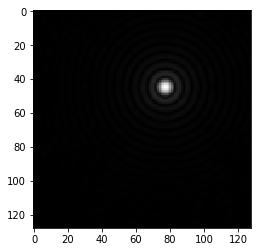

In [18]:
Image = G.get(P)
plt.gray()
plt.imshow(Image)
plt.show()

## More features

That's neat and all, but how do we do something more complicated? By adding features together! Let us add some gaussian noise. 

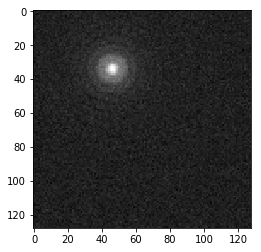

In [21]:
Noise = Gaussian(
    mu=0, 
    sigma=np.linspace(0.02,0.05)
)

Image = G.get(P + Noise)
plt.gray()
plt.imshow(Image)
plt.show()